In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [1]:
!pip install CFEDemands --pre

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [2]:
Sheets = {'ICRISAT':'13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo',
         # 'Your dataset':'Your google spreadsheet key',
         }

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [3]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['ICRISAT'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("Household Characteristics", Sheets['ICRISAT'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [4]:
z.head()

,,,M 0-3,F 0-3,M 4-8,F 4-8,M 9-13,F 9-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log Hsize
j,t,m,,,,,,,,,,,,,,,
A1,75,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1.945910
A10,75,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1.791759
A12,75,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1.098612
A2,75,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
A3,75,1,0,0,0,0,0,2,0,0,1,0,0,0,0,1,1.386294


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [5]:
y.head()

,,,Other,Other Food,Other Narcotics,Clothing,"Medicine, cosmetics, etc.",Travel & Entertainment,Utilities,Domestic labor,Ceremonial expenses,Edible oils,...,Other spices,YB,YK,YZ,ZA,ZB,ZF,Gur (jaggery),ZJ,ZK
j,t,m,,,,,,,,,,,,,,,,,,,,,
A1,75,1,NaN,NaN,1.131402,5.552960,NaN,NaN,2.714695,NaN,NaN,2.406945,...,2.459589,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A10,75,1,NaN,NaN,NaN,4.976734,NaN,NaN,2.525729,NaN,NaN,2.778819,...,3.010621,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A12,75,1,NaN,NaN,NaN,1.098612,NaN,NaN,2.433613,NaN,NaN,2.054124,...,2.054124,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A2,75,1,NaN,NaN,NaN,4.477337,NaN,NaN,2.251292,NaN,NaN,2.476538,...,2.174752,NaN,NaN,NaN,NaN,NaN,NaN,0.405465,NaN,NaN
A3,75,1,NaN,NaN,NaN,4.094345,NaN,NaN,2.163323,NaN,NaN,1.974081,...,1.945910,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


## Estimation



With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [6]:
import cfe

result = cfe.Result(y=y,z=z)

/home/ethanligon/anaconda3/lib/python3.7/typing.py:845: FutureWarning: xarray subclass Result should explicitly define __slots__
  super().__init_subclass__(*args, **kwargs)


This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [7]:
result

<xarray.Result>
Dimensions:           (i: 36, j: 260, k: 15, m: 1, t: 10)
Coordinates:
  * j                 (j) object 'A1' 'A10' 'A12' 'A2' ... 'F7' 'F8' 'F80' 'F9'
  * t                 (t) int64 75 76 77 78 79 80 81 82 83 84
  * m                 (m) int64 1
  * i                 (i) object 'Barber service (and material relating to it)' ... 'Wheat (HYV)'
  * k                 (k) <U9 'M 0-3' 'F 0-3' 'M 4-8' ... 'F 51+' 'log Hsize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.099 1.099 nan
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (j, t, m, i) float64 nan 2.37 nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.099 1.099 nan
Attributes:
    firstround:            75
    min_proportion_items:  0.125
    min_xproducts:         30
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    verbose:               False

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [8]:
result.get_reduced_form()

After running this we can examine the estimated coefficients $\delta$:



In [9]:
result.delta.to_dataframe().unstack('k')

delta            \
k                                                      F 0-3   F 14-18   
i                                                                        
Barber service (and material relating to it)       -0.155298  0.069883   
Bengalgram dhal                                    -0.351645 -0.018770   
Brinjal                                            -0.137576  0.050528   
Ceremonial expenses                                -0.140808  0.282122   
Chillies                                           -0.074296  0.001783   
Clothing                                           -0.163853 -0.062719   
Coconut                                            -0.234838  0.058048   
Complete meals in hotel                             0.240410 -0.090966   
Cosmetics tooth paste etc.                         -0.205726  0.055812   
Edible oils                                         0.050772 -0.018103   
Educational material expenses (pen, books, pape...  0.210978  0.149959   
Ghee                                               -0.358507 -0.303368   
Grinding/milling charges                           -0.094573 -0.007706   
Groundnuts                                         -0.352390 -0.012557   
Gur (jaggery)                                       0.027076  0.073120   
Jowar/Sorghum (HYV)                                 0.108568 -0.018231   
Jowar/Sorghum (Local variety)                      -0.310349 -0.032083   
Medicine Doctor's fees                              0.046243 -0.023007   
Milk                                               -0.099425 -0.052953   
Onion                                              -0.003150 -0.103355   
Other dhal                                         -0.313536  0.066354   
Other spices                                       -0.116720 -0.027050   
Other sugar products                                0.063878 -0.053445   
Other vegetables                                   -0.026503 -0.116802   
Pan, betel, etc.                                    0.002070  0.072269   
Processed foods (e.g. biscuits Khara, syrup, ba... -0.023874 -0.220040   
Redgram dhal                                       -0.293705 -0.084976   
Rice (local variety)                               -0.025194 -0.080766   
Soap, washing powder                               -0.053425  0.045728   
Sugar                                              -0.319545 -0.101454   
Tea                                                 0.143878  0.012398   
Tobacco, beedi                                      0.002503 -0.026428   
Tomato                                             -0.302385 -0.018111   
Travel & Entertainment                             -0.167644  0.063042   
Utilities                                          -0.006988  0.031880   
Wheat (HYV)                                         0.345518  0.170980   

                                                                        \
k                                                    F 19-30   F 31-50   
i                                                                        
Barber service (and material relating to it)       -0.068227  0.096067   
Bengalgram dhal                                     0.144831  0.292641   
Brinjal                                             0.059101  0.027299   
Ceremonial expenses                                -0.004657  0.132529   
Chillies                                            0.062246  0.240842   
Clothing                                            0.083455  0.314037   
Coconut                                             0.184028  0.202727   
Complete meals in hotel                             0.295855  0.225875   
Cosmetics tooth paste etc.                          0.239585  0.273921   
Edible oils                                         0.082781  0.209394   
Educational material expenses (pen, books, pape...  0.207006  0.388022   
Ghee                                                0.039563 -0.052337   
Grinding/milling charges                            0.0318

Also the good-time constants $a_{it}$:



In [10]:
result.a.to_dataframe().unstack('i')

a                            \
i    Barber service (and material relating to it) Bengalgram dhal   Brinjal   
t  m                                                                          
75 1                                     1.639606        2.211314 -0.647588   
76 1                                     0.527107        1.257281  0.440981   
77 1                                     0.338447        1.624714  0.358145   
78 1                                     0.362211        1.712362  0.252359   
79 1                                     0.381325        1.963829  0.543881   
80 1                                     0.409766        1.965053  0.949557   
81 1                                     0.899481        1.796022  1.292350   
82 1                                     0.536633        1.768787  0.544825   
83 1                                    -2.014022        1.692287 -1.117433   
84 1                                          NaN             NaN       NaN   

                                                        \
i    Ceremonial expenses  Chillies  Clothing   Coconut   
t  m                                                     
75 1            2.015941  2.504149  2.808436  0.024896   
76 1            1.532861  3.109310  3.539089  0.052982   
77 1            0.580013  2.988572  3.508620  0.582652   
78 1            0.986107  2.840087  3.426051  0.618594   
79 1            1.196748  3.219860  3.435293  1.137889   
80 1            1.273603  3.260600  3.780804  1.111884   
81 1            0.584513  3.515536  3.883632  1.430204   
82 1            0.328785  2.908384  3.413429  1.290482   
83 1            2.379180  0.448104  3.262924  1.557921   
84 1                 NaN       NaN       NaN       NaN   

                                                                     ...  \
i    Complete meals in hotel Cosmetics tooth paste etc. Edible oils  ...   
t  m                                                                 ...   
75 1                1.739906                   0.816662    2.618672  ...   
76 1                2.055805                   1.326507    3.203524  ...   
77 1                2.366018                   1.514680    3.534650  ...   
78 1                2.930517                   1.424382    3.190261  ...   
79 1                2.084027                   1.675132    3.864440  ...   
80 1                2.104684                   1.783004    4.135122  ...   
81 1                3.315428                   2.026163    3.825737  ...   
82 1                3.312780                   1.472446    3.786849  ...   
83 1                4.194982                  -1.104029    1.326281  ...   
84 1                     NaN                        NaN         NaN  ...   

                                                                       \
i    Redgram dhal Rice (local variety) Soap, washing powder     Sugar   
t  m                                                                    
75 1     3.026875             2.972779             0.294528  0.959657   
76 1     1.618166             1.900983             0.659113  1.316965   
77 1     2.749476             2.574779             0.915852  1.635037   
78 1     1.957461             2.661999             1.035408  1.953014   
79 1     2.509986             2.926459             1.455115  2.097439   
80 1     2.673328             3.370759             1.463322  2.271587   
81 1     2.636365             3.722601             1.459143  2.161658   
82 1     2.451816             3.551195             1.220578  1.635239   
83 1     4.662835             4.224447             0.584687  0.691763   
84 1          NaN                  NaN                  NaN       NaN   

                                                                          \
i          Tea Tobacco, beedi    Tomato Travel & Entertainment Utilities   
t  m                                                                       
75 1  2.040962       1.957728 -0.715497               2.061131  2.154264   
76 1  2.544336       2

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [11]:
result.get_beta().to_dataframe()

,beta
i,
Barber service (and material relating to it),0.150678
Bengalgram dhal,0.729380
Brinjal,0.397938
Ceremonial expenses,1.112815
Chillies,0.326102
Clothing,0.578654
Coconut,0.219991
Complete meals in hotel,0.120233
Cosmetics tooth paste etc.,0.642459


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



/home/ethanligon/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


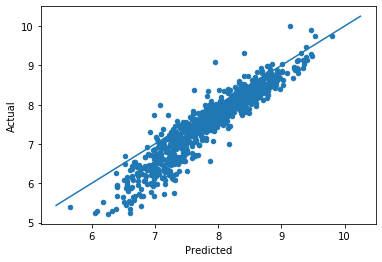

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

### Saving Result



You can save the estimated result, using something like



In [13]:
result.to_dataset('icrisat.ds')

<xarray.Dataset>
Dimensions:           (i: 36, j: 260, k: 15, kp: 15, m: 1, t: 10)
Coordinates:
  * k                 (k) object 'M 0-3' 'F 0-3' 'M 4-8' ... 'F 51+' 'log Hsize'
  * m                 (m) int64 1
  * t                 (t) int64 75 76 77 78 79 80 81 82 83 84
  * j                 (j) object 'A1' 'A10' 'A12' 'A2' ... 'F7' 'F8' 'F80' 'F9'
  * i                 (i) object 'Barber service (and material relating to it)' ... 'Wheat (HYV)'
  * kp                (kp) <U9 'F 0-3' 'F 14-18' ... 'M 9-13' 'log Hsize'
Data variables:
    alpha             object None
    beta              (i) float64 0.1507 0.7294 0.3979 ... 0.6956 0.3832 1.076
    delta             (k, i) float64 -0.1121 -0.1646 -0.1375 ... 0.247 -0.4535
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.099 1.099 nan
    loglambdas        (j, t, m) float64 2.078 nan nan 1.55 ... nan nan nan nan
    a                 (i, t, m) float64 1.64 0.5271 0.3384 ... 3.873 5.326 nan
    yhat              (j, t, m, i) float64 3.368 2.101 -0.2031 ... nan nan nan
    ce                (j, t, m, i) float64 nan -1.246 nan nan ... nan nan nan
    cehat             (j, t, m, i) float64 -0.3131 -1.516 -0.8268 ... nan nan
    e                 (j, t, m, i) float64 nan 0.2691 nan nan ... nan nan nan
    delta_covariance  (i, k, kp) float64 0.0004356 0.002651 ... -0.01987 0.1055
    se_delta          (i, k) float64 0.09453 0.1272 0.1139 ... 0.1746 0.3248
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.2687 0.2428 0.1389 ... 0.4916 nan
    y                 (j, t, m, i) float64 nan 2.37 nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.099 1.099 nan